# Rainfall-runoff experiment

In this experiment, we'll try to learn model for simple artificial dataset of simulated rainfall-runoff scenario.

The task is to forecast runoff (prutok) based on rainfall during time. We can test longer dependencies through time and power of LSTM networks.

In [1]:
%tensorflow_version 2.x
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import random

from tensorflow.keras import Model
from tensorflow.keras.layers import Input, Dense, Dropout, LSTM, SimpleRNN

First, we need a dataset. Here's a code that simulates one river scenario.

There are two methods: `get_precip` for rainfall and `gen_discharge` for runoff. Runoff is lagged in time based on topography of the river (see `BASINS = [BASIN(area, lag)]` array)

In [9]:
MIN_EVENT_TIME = 5
MAX_EVENT_TIME = 20
MIN_EVENT_POWER = 0.05
MAX_EVENT_POWER = 0.5

BASINS = [
    (0.02, 20),
    (0.02, 30),
    (0.01, 35),
    (0.03, 41),
    (0.02, 45),
    (0.01, 54),
    (0.02, 65),
    (0.01, 75),
]

def generate_precipitation(num_samples, events_ratio):  
    
    result = np.zeros(num_samples)
    num_events = int(events_ratio * num_samples)
    
    for event_start in random.sample(range(num_samples - MAX_EVENT_TIME), num_events):
        event = np.zeros((num_samples,))
        event_time = random.randint(MIN_EVENT_TIME, MAX_EVENT_TIME)
        event_power = random.random() * (MAX_EVENT_POWER - MIN_EVENT_POWER) + MIN_EVENT_POWER
        event[event_start: event_start + event_time] = (np.cos(np.linspace(-np.pi, np.pi, num=event_time)) * 0.5 + 0.5) * event_power
        result += event
    
    return result

def generate_discharge(basins, precip, runoff):            
    all_precip = np.zeros(precip.shape)
    
    for basin in basins:
        lagged = np.roll(precip * basin[0], basin[1])
        lagged[:basin[1]] = 0
        all_precip += lagged
        
    discharge = np.zeros(precip.shape)
        
    for i in range(1, len(discharge)):
        discharge[i] = discharge[i - 1]  * (1 - runoff) + all_precip[i]
        
    return discharge

Let's see how our simulated river behaves:

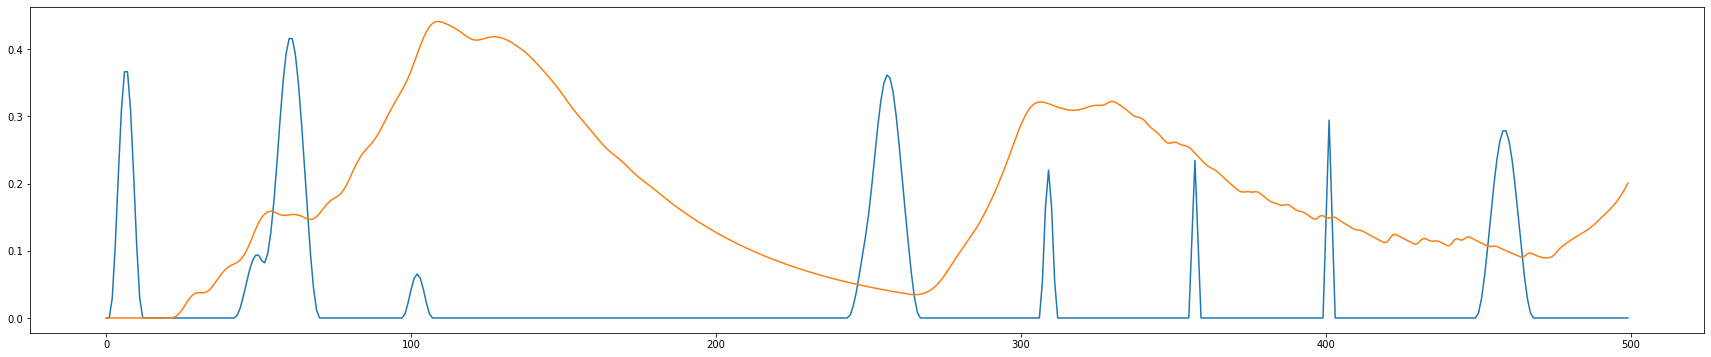

In [16]:
precip = generate_precipitation(500, 0.02)
discharge = generate_discharge(BASINS, precip, 0.02)

plt.figure(figsize=(30,6))
plt.plot(precip)
plt.plot(discharge)
plt.show()

We can generate some training examples for this river and try fit a neural network model to see if the model can learn the river hidden behavior.

In [18]:
import random

NUM_SAMPLES = 2000
SEQ_LEN = 500

raw_train_X = [generate_precipitation(SEQ_LEN, 0.02) for i in range(NUM_SAMPLES)]
raw_train_Y = [generate_discharge(BASINS, precip_sample, 0.02) for precip_sample in raw_train_X]

TODO : Test various models:

* fixed window feed-forward network
* LSTMs 
* test on longer sequences
* figure out how to use feed-forward network to longer predictions
* figure out how to use this model for day-to-day prediction

**WATCH for correct activation function!** (linear)